## Model steps summary:
In this Predictive model to estimate house prices based on the training and test data. we have followed the following steps. (we are using the same code of FDS assigment 1 on which we have worked earlier)

     a. Data Exploration:
          * Load and examine the dataset.
          * Tackle missing values, handle outliers, and clean up the data properly.
            
     b. Feature Engineering or Normalization:
          * Convert any categorical data into numerical values.
          * Create new features from the existing data if required.
    
     c. Modelling:
          * Train different models like Linear Regression, Random Forest, and XGBoost.
          * Compare their performance and choose the one that works best.
    
     d. Predictions:
          * Finally, use the best-performing model to make predictions on the test data.
    
     e. Evaluation:
          * Use the right metrics to assess the model's performance, such as RMSE or MAE.

### Developing model Summary:
##### Step 1. Clean the dataset of Train.csv and export the cleaned dataset as cleaned_Train.csv
       
##### Step 2. Create spliting training and testing data on cleaned_train.csv
    
##### Step 3. Clean the dataset of Test.csv and export the cleaned dataset as cleaned_train.csv
       
##### Step 4. Load the Training and Test Datasets.
                   * Training dataset = cleaned_Tain.csv
                   * Testing dataset = cleaned_Test.csv
    
##### Step 5. Train Models:
                   * Linear Regression
                   * Lasso Regression
                   * Ridge Regression
        
##### Step 6. Calculate Training and Testing Errors
       
##### Step 7. Compare Errors
        
##### Step 8. Interepret the output
   


# Step 1: Clean the dataset of Train.csv and export the cleaned dataset as cleaned_Train.csv

In [77]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #supress warnings
#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
#data reading
data = pd.DataFrame(pd.read_csv(r'D:\Aman\PA-assignment1\Train.csv'))
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Data cleaning

In [80]:
#checking for null values
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [81]:
#lets drop society column due to many missing values
data = data.drop("society", axis=1)
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [82]:
#lets drop repeated column
#data = data.drop("total_sqft", axis=1)
#data.head()

In [83]:
#lets drop unneccesary column
data = data.drop("availability", axis=1)
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [84]:
#dropping rows having missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12710 non-null  object 
 1   location    12710 non-null  object 
 2   size        12710 non-null  object 
 3   total_sqft  12710 non-null  object 
 4   bath        12710 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       12710 non-null  float64
dtypes: float64(3), object(4)
memory usage: 794.4+ KB


In [85]:
#No missing values
data.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [86]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [87]:
#checking for duplicate values
data.duplicated().sum()

685

In [88]:
#removing duplicates
data.drop_duplicates(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12025 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12025 non-null  object 
 1   location    12025 non-null  object 
 2   size        12025 non-null  object 
 3   total_sqft  12025 non-null  object 
 4   bath        12025 non-null  float64
 5   balcony     12025 non-null  float64
 6   price       12025 non-null  float64
dtypes: float64(3), object(4)
memory usage: 751.6+ KB


In [89]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [90]:
#lets convert string data to numeric
data['area_type'] = data['area_type'].map({'Super built-up  Area': 1, 'Built-up  Area': 2,'Carpet  Area':3,'Plot  Area':4})
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,1,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,4,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,1,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,1,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [91]:
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [92]:
data['size'] = data['size'].map({'1 RK':0.5,'1 BHK':1,'1 Bedroom': 1,'2 BHK':2,'2 Bedroom': 2, 
'3 BHK':3,'3 Bedroom': 3,'4 BHK':4,'4 Bedroom': 4,'5 BHK':5,'5 Bedroom': 5,'6 BHK':6,'6 Bedroom': 6,
'7 BHK':7,'7 Bedroom': 7,'8 BHK':8,'8 Bedroom': 8,'9 BHK':9,'9 Bedroom': 9,'10 Bedroom':10,'11 BHK':11,'11 Bedroom': 11,
'12 Bedroom':12, '13 BHK':13,'14 BHK':14,'27 BHK':27,'43 Bedroom':43}).astype("float64")
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,1,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,4,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,2,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,1,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,1,Kothanur,2.0,1200,2.0,1.0,51.00


In [93]:
data["size"].unique()

array([ 2. ,  4. ,  3. ,  1. ,  0.5,  6. ,  8. ,  7. ,  5. , 11. ,  9. ,
       27. , 43. , 14. , 12. , 10. , 13. ])

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12025 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12025 non-null  int64  
 1   location    12025 non-null  object 
 2   size        12025 non-null  float64
 3   total_sqft  12025 non-null  object 
 4   bath        12025 non-null  float64
 5   balcony     12025 non-null  float64
 6   price       12025 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 751.6+ KB


In [95]:
data.describe()

,area_type,size,bath,balcony,price
count,12025.000000,12025.000000,12025.000000,12025.000000,12025.000000
mean,1.649231,2.753389,2.635676,1.584283,108.160914
std,1.064474,1.226744,1.245581,0.824949,134.729999
min,1.000000,0.500000,1.000000,0.000000,8.000000
25%,1.000000,2.000000,2.000000,1.000000,50.000000
50%,1.000000,3.000000,2.000000,2.000000,70.000000
75%,2.000000,3.000000,3.000000,2.000000,117.000000
max,4.000000,43.000000,40.000000,3.000000,2912.000000


<h3>Treating outliers</h3>

<Axes: xlabel='price', ylabel='Density'>

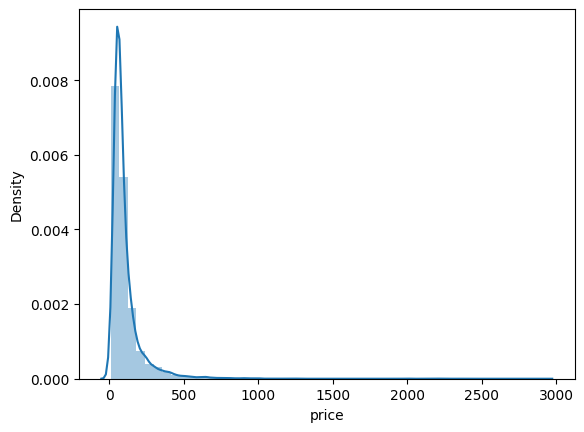

In [96]:
#create distribution plot
sns.distplot(data['price'])

<Axes: ylabel='price'>

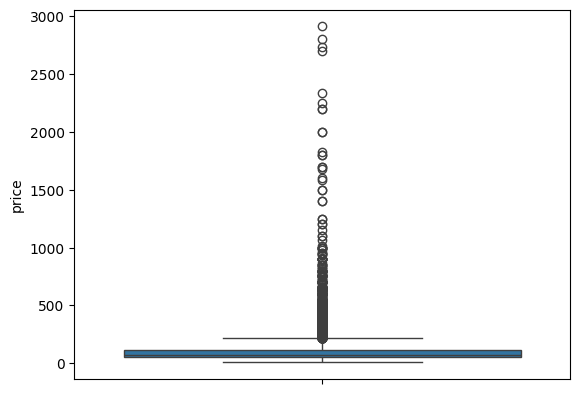

In [97]:
sns.boxplot(data['price'])

In [98]:
print("Mean is : ", data['price'].mean())
print("Median is : ",data['price'].median())
print("Mode is :", data['price'].mode())

Mean is :  108.1609135135135
Median is :  70.0
Mode is : 0    75.0
Name: price, dtype: float64


In [99]:
#fixing outliers
percentile25 = data['price'].quantile(0.25)
percentile75 = data['price'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 217.5
Lower limit -50.5


In [100]:
new_data= data[data['price'] < upper_limit]
new_data.shape

(10893, 7)

In [101]:
#normalize and clean total_sqft column
import re
import math

# Conversion factors for different units to Square Feet
conversion_factors = {
    "Sq. Meter": 10.7639,  # 1 Sq. Meter = 10.7639 Sq. Feet
    "Acres": 43560,        # 1 Acre = 43560 Sq. Feet
    "Sq. Yards": 9,        # 1 Sq. Yard = 9 Sq. Feet
    "Grounds": 2400,       # 1 Ground = 2400 Sq. Feet
    "Guntha": 1089,        # 1 Guntha = 1089 Sq. Feet
}


# Function to handle conversion and cleaning
def convert_to_sqft(value):
    # Handle range values
    if '-' in value:
        # Split and take the mean of the range
        range_values = value.split('-')
        low = float(range_values[0].strip())
        high = float(range_values[1].strip())
        mean_value = (low + high) / 2
        return round(mean_value)
    
    # Handle values with units
    for unit, factor in conversion_factors.items():
        if unit in value:
            # Extract the numeric value and convert to square feet
            numeric_value = float(re.findall(r'\d+\.?\d*', value)[0])
            sqft_value = numeric_value * factor
            return math.ceil(sqft_value)  # Round up to nearest integer
    
    # If the value is already in square feet (no units), return it as an integer
    if value.replace('.', '', 1).isdigit():
        return math.ceil(float(value))
    
    # Handle unknown formats like 'Cents' (optional)
    if 'Cents' in value:
        # Since conversion for Cents is not defined, handle it according to your logic
        # Assuming we want to skip/ignore 'Cents' for now:
        return None

# Apply the conversion function to 'total_sqft' column
new_data['total_sqft'] = new_data['total_sqft'].apply(convert_to_sqft)

# Show the cleaned data
new_data

,area_type,location,size,total_sqft,bath,balcony,price
0,1,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,4,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,1,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13308,2,Bannerghatta Road,3.0,1527.0,3.0,1.0,142.00
13310,1,Rachenahalli,2.0,1050.0,2.0,2.0,52.71
13312,1,Bellandur,2.0,1262.0,2.0,2.0,47.00
13314,1,Green Glen Layout,3.0,1715.0,3.0,3.0,112.00


In [102]:
new_data.isna().sum()

area_type     0
location      0
size          0
total_sqft    1
bath          0
balcony       0
price         0
dtype: int64

In [103]:
new_data = new_data.dropna()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10892 entries, 0 to 13317
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   10892 non-null  int64  
 1   location    10892 non-null  object 
 2   size        10892 non-null  float64
 3   total_sqft  10892 non-null  float64
 4   bath        10892 non-null  float64
 5   balcony     10892 non-null  float64
 6   price       10892 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 680.8+ KB


In [104]:
new_data.to_csv('cleaned_Train.csv', index=False)

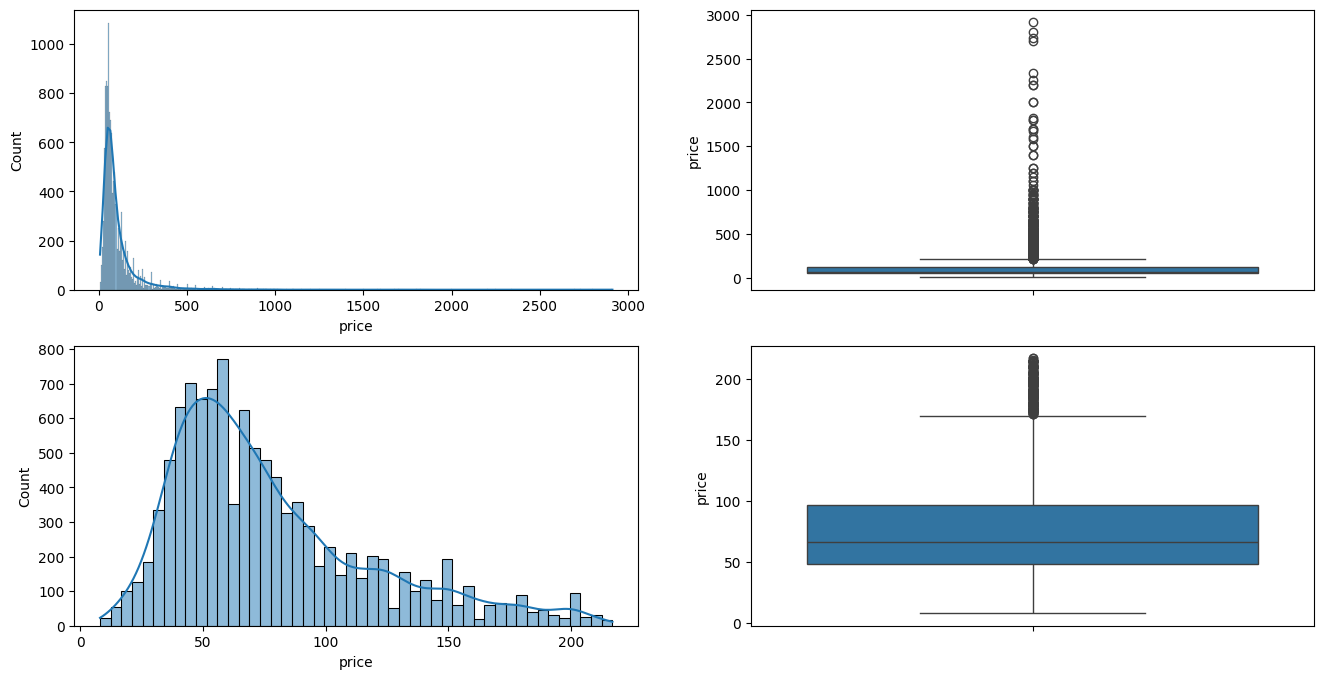

In [105]:
#Comparing before and after outliers

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data['price'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = data['price'])

plt.subplot(2,2,3)
sns.histplot(new_data['price'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_data['price'])

plt.show()

# Step 2: Creating Model for Training Data

In [106]:
#selecting input and output columns
features = new_data[['area_type','size','total_sqft','bath','balcony']]

label = new_data['price']

In [107]:
#spliting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
#training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [108]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,features.columns,columns=['Coefficient'])
coeff_df

11.639398577591976


,Coefficient
area_type,3.864465
size,4.622973
total_sqft,0.000058
bath,17.604316
balcony,2.933592


In [109]:
#applying model for predictions
predictions = lm.predict(X_test)

In [110]:
#evaluating the model
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24.519041620210775
MSE: 1104.3112325224813
RMSE: 33.231178620724265


In [111]:
# 24-02-2024 Class7's reference code applied as required assignment Q5

In [112]:
#import library
from sklearn.linear_model import LinearRegression

In [113]:
# Train the model
m2 = LinearRegression().fit(X_train, y_train)

In [114]:
# Displaying the Bet0 values
m2.intercept_

11.639398577591976

In [115]:
# Displaying the Beta Coefficients
m2.coef_

array([3.86446530e+00, 4.62297311e+00, 5.83613971e-05, 1.76043164e+01,
       2.93359185e+00])

In [116]:
# Predict on the test data
predictions = m2.predict(X_test)
predictions

array([43.63627198, 91.08122846, 65.87610917, ..., 65.89350087,
       92.01630393, 91.09155842])

In [117]:
# Merge X_test, y_test and the predictions
df1 = X_test.copy()
df1['price'] = y_test
df1['predicted price'] = predictions
df1.head(10)

,area_type,size,total_sqft,bath,balcony,price,predicted price
7932,1,1.0,650.0,1.0,2.0,19.87,43.636272
9627,1,3.0,1623.0,3.0,3.0,155.00,91.081228
11854,1,2.0,865.0,2.0,2.0,33.00,65.876109
12216,2,2.0,1123.0,2.0,2.0,60.00,69.755632
6100,1,1.0,550.0,1.0,1.0,23.00,40.696844
1699,2,3.0,1890.0,2.0,2.0,85.00,74.423368
13090,1,3.0,1576.0,3.0,2.0,58.70,88.144894
11438,1,2.0,1133.0,2.0,1.0,33.99,62.958158
2003,2,2.0,1146.0,2.0,1.0,38.50,66.823382
13064,1,2.0,1035.0,2.0,1.0,47.00,62.952439


In [118]:
# calculate the Error
df1['error'] = df1['price'] - df1['predicted price']
df1.head(10)

,area_type,size,total_sqft,bath,balcony,price,predicted price,error
7932,1,1.0,650.0,1.0,2.0,19.87,43.636272,-23.766272
9627,1,3.0,1623.0,3.0,3.0,155.00,91.081228,63.918772
11854,1,2.0,865.0,2.0,2.0,33.00,65.876109,-32.876109
12216,2,2.0,1123.0,2.0,2.0,60.00,69.755632,-9.755632
6100,1,1.0,550.0,1.0,1.0,23.00,40.696844,-17.696844
1699,2,3.0,1890.0,2.0,2.0,85.00,74.423368,10.576632
13090,1,3.0,1576.0,3.0,2.0,58.70,88.144894,-29.444894
11438,1,2.0,1133.0,2.0,1.0,33.99,62.958158,-28.968158
2003,2,2.0,1146.0,2.0,1.0,38.50,66.823382,-28.323382
13064,1,2.0,1035.0,2.0,1.0,47.00,62.952439,-15.952439


In [119]:
# Calculate the Squared Error (sqerror)
df1['sqerror'] = df1['error']**2
df1.head(10)

,area_type,size,total_sqft,bath,balcony,price,predicted price,error,sqerror
7932,1,1.0,650.0,1.0,2.0,19.87,43.636272,-23.766272,564.835684
9627,1,3.0,1623.0,3.0,3.0,155.00,91.081228,63.918772,4085.609356
11854,1,2.0,865.0,2.0,2.0,33.00,65.876109,-32.876109,1080.838554
12216,2,2.0,1123.0,2.0,2.0,60.00,69.755632,-9.755632,95.172350
6100,1,1.0,550.0,1.0,1.0,23.00,40.696844,-17.696844,313.178287
1699,2,3.0,1890.0,2.0,2.0,85.00,74.423368,10.576632,111.865144
13090,1,3.0,1576.0,3.0,2.0,58.70,88.144894,-29.444894,867.001761
11438,1,2.0,1133.0,2.0,1.0,33.99,62.958158,-28.968158,839.154188
2003,2,2.0,1146.0,2.0,1.0,38.50,66.823382,-28.323382,802.213978
13064,1,2.0,1035.0,2.0,1.0,47.00,62.952439,-15.952439,254.480302


In [120]:
# Calculate the Mean Square Error (MSE)
import numpy as np
MSE = np.mean(df1['sqerror'])
MSE

1104.3112325224813

In [121]:
# Calculate the Root Mean Square Error (RMSE)
RMSE = MSE**0.5
RMSE

33.231178620724265

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you've trained the model already on X_train, y_train

# Predict on the training set
y_train_pred = lm.predict(X_train)

# Calculate Training RMSE and MAE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")


Training RMSE: 33.221338356979956
Training MAE: 24.7851078951167


# Step 3: Clean the dataset of Testing dataset

In [123]:
# Cleaning Test Data (Test.csv)

In [124]:
#data reading for Test.csv
testdata = pd.DataFrame(pd.read_csv(r'D:\Aman\PA-assignment1\Test.csv'))
testdata.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [125]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   size          1478 non-null   object 
 4   society       854 non-null    object 
 5   total_sqft    1480 non-null   object 
 6   bath          1473 non-null   float64
 7   balcony       1411 non-null   float64
 8   price         0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 104.2+ KB


In [126]:
#checking for null values
testdata.isna().sum()

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

In [127]:
#lets drop society column due to many missing values
testdata = testdata.drop("society", axis=1)
testdata.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,1161,2.0,1.0,NaN


In [128]:
#lets drop unneccesary column
testdata = testdata.drop("availability", axis=1)
testdata = testdata.drop("price", axis=1)
testdata.head()

,area_type,location,size,total_sqft,bath,balcony
0,Super built-up Area,Brookefield,2 BHK,1225,2.0,2.0
1,Plot Area,Akshaya Nagar,9 Bedroom,2400,9.0,2.0
2,Plot Area,Hennur Road,4 Bedroom,1650,5.0,2.0
3,Super built-up Area,Kodichikkanahalli,3 BHK,1322,3.0,1.0
4,Super built-up Area,Konanakunte,2 BHK,1161,2.0,1.0


In [129]:
#dropping rows having missing values
testdata = testdata.dropna()
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1411 entries, 0 to 1479
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   1411 non-null   object 
 1   location    1411 non-null   object 
 2   size        1411 non-null   object 
 3   total_sqft  1411 non-null   object 
 4   bath        1411 non-null   float64
 5   balcony     1411 non-null   float64
dtypes: float64(2), object(4)
memory usage: 77.2+ KB


In [130]:
#No missing values
testdata.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
dtype: int64

In [131]:
testdata.head()

,area_type,location,size,total_sqft,bath,balcony
0,Super built-up Area,Brookefield,2 BHK,1225,2.0,2.0
1,Plot Area,Akshaya Nagar,9 Bedroom,2400,9.0,2.0
2,Plot Area,Hennur Road,4 Bedroom,1650,5.0,2.0
3,Super built-up Area,Kodichikkanahalli,3 BHK,1322,3.0,1.0
4,Super built-up Area,Konanakunte,2 BHK,1161,2.0,1.0


In [132]:
#checking for duplicate values
testdata.duplicated().sum()

50

In [133]:
#removing duplicates
testdata.drop_duplicates(inplace = True)
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1361 entries, 0 to 1479
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   1361 non-null   object 
 1   location    1361 non-null   object 
 2   size        1361 non-null   object 
 3   total_sqft  1361 non-null   object 
 4   bath        1361 non-null   float64
 5   balcony     1361 non-null   float64
dtypes: float64(2), object(4)
memory usage: 74.4+ KB


In [134]:
testdata['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [135]:
#lets convert string data to numeric
testdata['area_type'] = testdata['area_type'].map({'Super built-up  Area': 1, 'Built-up  Area': 2,'Carpet  Area':3,'Plot  Area':4})
testdata.head()

,area_type,location,size,total_sqft,bath,balcony
0,1,Brookefield,2 BHK,1225,2.0,2.0
1,4,Akshaya Nagar,9 Bedroom,2400,9.0,2.0
2,4,Hennur Road,4 Bedroom,1650,5.0,2.0
3,1,Kodichikkanahalli,3 BHK,1322,3.0,1.0
4,1,Konanakunte,2 BHK,1161,2.0,1.0


In [136]:
testdata["size"].unique()

array(['2 BHK', '9 Bedroom', '4 Bedroom', '3 BHK', '4 BHK', '1 BHK',
       '3 Bedroom', '1 Bedroom', '2 Bedroom', '5 Bedroom', '7 BHK',
       '8 Bedroom', '6 Bedroom', '1 RK', '7 Bedroom', '6 BHK', '8 BHK',
       '5 BHK', '10 Bedroom', '9 BHK'], dtype=object)

In [137]:
testdata['size'] = testdata['size'].map({'1 RK':0.5,'1 BHK':1,'1 Bedroom': 1,'2 BHK':2,'2 Bedroom': 2, 
'3 BHK':3,'3 Bedroom': 3,'4 BHK':4,'4 Bedroom': 4,'5 BHK':5,'5 Bedroom': 5,'6 BHK':6,'6 Bedroom': 6,
'7 BHK':7,'7 Bedroom': 7,'8 BHK':8,'8 Bedroom': 8,'9 BHK':9,'9 Bedroom': 9,'10 Bedroom':10,'11 BHK':11,'11 Bedroom': 11,
'12 Bedroom':12, '13 BHK':13,'14 BHK':14,'27 BHK':27,'43 Bedroom':43}).astype("float64")
testdata.head()

,area_type,location,size,total_sqft,bath,balcony
0,1,Brookefield,2.0,1225,2.0,2.0
1,4,Akshaya Nagar,9.0,2400,9.0,2.0
2,4,Hennur Road,4.0,1650,5.0,2.0
3,1,Kodichikkanahalli,3.0,1322,3.0,1.0
4,1,Konanakunte,2.0,1161,2.0,1.0


In [138]:
testdata["size"].unique()

array([ 2. ,  9. ,  4. ,  3. ,  1. ,  5. ,  7. ,  8. ,  6. ,  0.5, 10. ])

In [139]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1361 entries, 0 to 1479
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   1361 non-null   int64  
 1   location    1361 non-null   object 
 2   size        1361 non-null   float64
 3   total_sqft  1361 non-null   object 
 4   bath        1361 non-null   float64
 5   balcony     1361 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 74.4+ KB


In [140]:
testdata.describe()

,area_type,size,bath,balcony
count,1361.000000,1361.000000,1361.000000,1361.000000
mean,1.701690,2.833946,2.695812,1.566495
std,1.105097,1.266646,1.259688,0.838518
min,1.000000,0.500000,1.000000,0.000000
25%,1.000000,2.000000,2.000000,1.000000
50%,1.000000,3.000000,2.000000,2.000000
75%,2.000000,3.000000,3.000000,2.000000
max,4.000000,10.000000,10.000000,3.000000


In [141]:
#normalize and clean total_sqft column
import re
import math

# Conversion factors for different units to Square Feet
conversion_factors = {
    "Sq. Meter": 10.7639,  # 1 Sq. Meter = 10.7639 Sq. Feet
    "Acres": 43560,        # 1 Acre = 43560 Sq. Feet
    "Sq. Yards": 9,        # 1 Sq. Yard = 9 Sq. Feet
    "Grounds": 2400,       # 1 Ground = 2400 Sq. Feet
    "Guntha": 1089,        # 1 Guntha = 1089 Sq. Feet
}


# Function to handle conversion and cleaning
def convert_to_sqft(value):
    # Handle range values
    if '-' in value:
        # Split and take the mean of the range
        range_values = value.split('-')
        low = float(range_values[0].strip())
        high = float(range_values[1].strip())
        mean_value = (low + high) / 2
        return round(mean_value)
    
    # Handle values with units
    for unit, factor in conversion_factors.items():
        if unit in value:
            # Extract the numeric value and convert to square feet
            numeric_value = float(re.findall(r'\d+\.?\d*', value)[0])
            sqft_value = numeric_value * factor
            return math.ceil(sqft_value)  # Round up to nearest integer
    
    # If the value is already in square feet (no units), return it as an integer
    if value.replace('.', '', 1).isdigit():
        return math.ceil(float(value))
    
    # Handle unknown formats like 'Cents' (optional)
    if 'Cents' in value:
        # Since conversion for Cents is not defined, handle it according to your logic
        # Assuming we want to skip/ignore 'Cents' for now:
        return None

# Apply the conversion function to 'total_sqft' column
testdata['total_sqft'] = testdata['total_sqft'].apply(convert_to_sqft)

# Show the cleaned testdata
testdata

,area_type,location,size,total_sqft,bath,balcony
0,1,Brookefield,2.0,1225,2.0,2.0
1,4,Akshaya Nagar,9.0,2400,9.0,2.0
2,4,Hennur Road,4.0,1650,5.0,2.0
3,1,Kodichikkanahalli,3.0,1322,3.0,1.0
4,1,Konanakunte,2.0,1161,2.0,1.0
...,...,...,...,...,...,...
1474,1,Byadarahalli,4.0,4250,4.0,2.0
1476,1,Gottigere,3.0,1660,3.0,2.0
1477,1,Channasandra,2.0,1216,2.0,2.0
1478,2,Tumkur Road,2.0,996,2.0,1.0


In [142]:
testdata.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
dtype: int64

In [143]:
testdata = testdata.dropna()
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1361 entries, 0 to 1479
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   1361 non-null   int64  
 1   location    1361 non-null   object 
 2   size        1361 non-null   float64
 3   total_sqft  1361 non-null   int64  
 4   bath        1361 non-null   float64
 5   balcony     1361 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 74.4+ KB


In [144]:
testdata.to_csv('cleaned_Test.csv', index=False)

In [145]:
testdata.head()

,area_type,location,size,total_sqft,bath,balcony
0,1,Brookefield,2.0,1225,2.0,2.0
1,4,Akshaya Nagar,9.0,2400,9.0,2.0
2,4,Hennur Road,4.0,1650,5.0,2.0
3,1,Kodichikkanahalli,3.0,1322,3.0,1.0
4,1,Konanakunte,2.0,1161,2.0,1.0


In [146]:
#selecting input and output columns
testfeatures = testdata[['area_type','size','total_sqft','bath','balcony']]

In [147]:
#applying model for predictions
testpredictions = lm.predict(testfeatures)

In [148]:
# Display the predictions
print(testpredictions)

[ 65.89711928 233.15011629 139.57421414 ...  65.89659402  66.81462797
  69.75720747]


In [149]:
# testpredictions is part of a DataFrame
output_df = testdata[['area_type', 'size', 'total_sqft', 'bath', 'balcony']].copy()
output_df['Predicted_Price'] = testpredictions

# Round the 'Predicted_Price' column to 2 decimal places
output_df['Predicted_Price'] = output_df['Predicted_Price'].round(2)

# Display the top 5 predictions
print(output_df.head())

   area_type  size  total_sqft  bath  balcony  Predicted_Price
0          1   2.0        1225   2.0      2.0            65.90
1          4   9.0        2400   9.0      2.0           233.15
2          4   4.0        1650   5.0      2.0           139.57
3          1   3.0        1322   3.0      1.0            85.20
4          1   2.0        1161   2.0      1.0            62.96


In [150]:
output_df.to_csv('Predicted_Test.csv', index=False)

# Step 4: Load the cleaned Training and Test datasets
# Step 5: Train Models
# Step 6: Calculate Training and Testing Errors
# Step 7: Compare Errors
Below code is for Step 4 to Step 7

In [151]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Step 1: Load the datasets
train_data = pd.read_csv('D:\Aman\PA-assignment1\cleaned_Train.csv')
test_data = pd.read_csv('D:\Aman\PA-assignment1\Predicted_Test.csv')

# Step 2: Prepare features and target variable for Train and Test data
X_train = train_data[['area_type', 'size', 'total_sqft', 'bath', 'balcony']]
y_train = train_data['price']

X_test = test_data[['area_type', 'size', 'total_sqft', 'bath', 'balcony']]
y_test = test_data['Predicted_Price']

# Step 3: Initialize the models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization parameter for Lasso
ridge_model = Ridge(alpha=0.1)  # alpha is the regularization parameter for Ridge

# Step 4: Train the models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Step 5: Make predictions on training and test sets
# Linear Regression
y_train_pred_lr = linear_model.predict(X_train)
y_test_pred_lr = linear_model.predict(X_test)

# Lasso Regression
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Ridge Regression
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Step 6: Calculate errors (RMSE and MAE) for training and test sets
# Function to calculate RMSE and MAE
def calculate_errors(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

# Calculate errors for each model
train_errors = {
    "Model": ["Model-1 = Linear Regression", "Model-2 = Lasso Regression", "Model-3 = Ridge Regression"],
    "Train RMSE": [],
    "Train MAE": [],
    "Test RMSE": [],
    "Test MAE": []
}

# Linear Regression errors
train_rmse_lr, train_mae_lr = calculate_errors(y_train, y_train_pred_lr)
test_rmse_lr, test_mae_lr = calculate_errors(y_test, y_test_pred_lr)

# Lasso Regression errors
train_rmse_lasso, train_mae_lasso = calculate_errors(y_train, y_train_pred_lasso)
test_rmse_lasso, test_mae_lasso = calculate_errors(y_test, y_test_pred_lasso)

# Ridge Regression errors
train_rmse_ridge, train_mae_ridge = calculate_errors(y_train, y_train_pred_ridge)
test_rmse_ridge, test_mae_ridge = calculate_errors(y_test, y_test_pred_ridge)

# Append to the table
train_errors['Train RMSE'] = [train_rmse_lr, train_rmse_lasso, train_rmse_ridge]
train_errors['Train MAE'] = [train_mae_lr, train_mae_lasso, train_mae_ridge]
train_errors['Test RMSE'] = [test_rmse_lr, test_rmse_lasso, test_rmse_ridge]
train_errors['Test MAE'] = [test_mae_lr, test_mae_lasso, test_mae_ridge]

# Step 7: Convert errors into a DataFrame and display the table
error_df = pd.DataFrame(train_errors)

# Step 8: Apply styling to the DataFrame for proper formatting
styled_error_df = (
    error_df.style
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#87CEEB'),  # Light blue background for header
                  ('color', 'black'),                # Black text color for header
                  ('font-weight', 'bold'),           # Bold font for header
                  ('font-size', '12px'),             # Font size for header
                  ('border', '1px solid black')]     # Black border for header cells
    },
    {
        'selector': 'td',
        'props': [('border', '1px solid black')]     # Black border for all data cells
    }])
    .set_properties(**{'background-color': '#F5F5F5'}) # Light grey background for data cells
    .set_caption("Model Performance Comparison")       # Add a caption for the table
)

# Display the formatted table
styled_error_df


,Model,Train RMSE,Train MAE,Test RMSE,Test MAE
0,Model-1 = Linear Regression,33.222462,24.706156,0.241544,0.176209
1,Model-2 = Lasso Regression,33.222931,24.713564,0.299591,0.213233
2,Model-3 = Ridge Regression,33.222462,24.706169,0.241512,0.176195


# Step 8: Interepret the output

In [152]:
from IPython.display import display, Markdown

interpretation_text = """
### Model Performance Interpretation

1. **Training Errors**:
   - The **training RMSE** and **training MAE** are almost identical across all three models (Linear, Lasso, and Ridge), with **RMSE ≈ 33.22** and **MAE ≈ 24.71**. This indicates that all models fit the training data similarly.

2. **Testing Errors**:
   - The **testing RMSE** and **testing MAE** show a clear distinction between the models.
     - **Linear Regression** and **Ridge Regression** have much lower **Test RMSE** and **Test MAE** compared to **Lasso Regression**.
     - **Lasso Regression** has the highest **Test RMSE (0.30)** and **Test MAE (0.21)**, meaning it performs worse on the test set compared to the other two models.
     - **Linear Regression** and **Ridge Regression** have nearly identical **Test RMSE (~0.24)** and **Test MAE (~0.18)**, indicating that they generalize well to the test set.

3. **Best Model**:
   - **Linear Regression** and **Ridge Regression** perform equally well, and both models generalize well to the test data, making them the best choices for this problem.
   - **Lasso Regression** performs worse, likely due to higher regularization.


In summary, **Ridge Regression** or **Linear Regression** would be the best model for predicting house prices in this case.
"""

# Display the interpretation as styled Markdown
display(Markdown(interpretation_text))



### Model Performance Interpretation

1. **Training Errors**:
   - The **training RMSE** and **training MAE** are almost identical across all three models (Linear, Lasso, and Ridge), with **RMSE ≈ 33.22** and **MAE ≈ 24.71**. This indicates that all models fit the training data similarly.

2. **Testing Errors**:
   - The **testing RMSE** and **testing MAE** show a clear distinction between the models.
     - **Linear Regression** and **Ridge Regression** have much lower **Test RMSE** and **Test MAE** compared to **Lasso Regression**.
     - **Lasso Regression** has the highest **Test RMSE (0.30)** and **Test MAE (0.21)**, meaning it performs worse on the test set compared to the other two models.
     - **Linear Regression** and **Ridge Regression** have nearly identical **Test RMSE (~0.24)** and **Test MAE (~0.18)**, indicating that they generalize well to the test set.

3. **Best Model**:
   - **Linear Regression** and **Ridge Regression** perform equally well, and both models generalize well to the test data, making them the best choices for this problem.
   - **Lasso Regression** performs worse, likely due to higher regularization.


In summary, **Ridge Regression** or **Linear Regression** would be the best model for predicting house prices in this case.
